#**Loss Functions**

In [1]:
import numpy as np
from scipy.special import expit as logistic
import matplotlib.pyplot as plt

We require a means of identifying the 'quality' of our model parameters (weights), in terms of how well the distribution of the model's output matches a target variable. A loss function provides us with an estimate of how closely the distribution of model predictions matches the distribution of the target variable. There are a handful of commonly used loss functions, depending on the structure of the target variable (binary, categorical, or continuous). You are already familiar with MSE and MAE for continuous values, so I will focus here on cross-entropy loss for categorical outcomes. 

#*Binary Cross-Entropy / Log-loss*

With a binary outcome, the result can take on just two values: 0 and 1. We want the loss to be greater when the prediction is farther from the target value. So, when the true value is 0, we want the loss function to yield a smaller value when our prediction is closer to 0, and a larger value when our prediction is closer to 1. Similarly, if the true value is 1, we want the reverse to be true. Cross-entropy loss is a two-part function (one part for each ground-truth case) that outputs a positive loss value that grows expoentnially as the prediction moves away from the truth. 

Ground truth values:
 [[0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1
  1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1
  0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1]] 

Predicted values:
 [[0.28516375 0.34205926 0.02581157 0.4592643  0.8612341  0.09065479
  0.12239047 0.66265113 0.26662951 0.09576841 0.37247709 0.03442573
  0.18977414 0.21987941 0.65840391 0.78143482 0.04293078 0.63477347
  0.40211929 0.64437009 0.94842148 0.0047734  0.86813214 0.57480266
  0.6752209  0.60437145 0.69649796 0.74448094 0.82739618 0.09379415
  0.7468038  0.6272446  0.2394477  0.45239383 0.49955368 0.46248204
  0.39811365 0.29020107 0.22652267 0.28719599 0.49030296 0.09306166
  0.54724291 0.64743806 0.75234325 0.25646048 0.45684677 0.9558151
  0.10296493 0.32189375 0.58758482 0.12178967 0.73146918 0.63919821
  0.36376615 0.45730981 0.61852274 0.79654931 0.37935339 0.39808939
  0.42810181 0.7000167  0.98653012 0.79608013 0.39596649 0.37415336
  

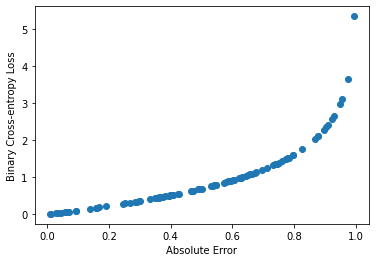

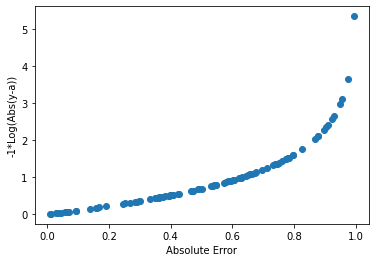

In [2]:
# Let's generate a vector of ground truth values, y, and synthetic predicted values, a (0-1 real values output by a sigmoid activation). 
y = np.where(np.random.rand(100,1)<0.5,0,1) 
a = np.random.rand(100,1)
print("Ground truth values:\n",y.transpose(),"\n")
print("Predicted values:\n",a.transpose(),"\n")

# The cross-entropy loss function is this - the left part applies when the ground truth is 0 (1-y = 1), and the right side when ground truth is y=1...
loss = -1*((1-y)*np.log(1-a) + y*(np.log(a)))
print("Loss values:\n",loss.transpose(),"\n")

# Now we can plot loss against the absolute error. 
plt.scatter(np.sort(abs(y-a)),np.sort(loss))
plt.xlabel("Absolute Error")
plt.ylabel("Binary Cross-entropy Loss")
plt.show()

# The cross-entropy loss equation is not that intuitive, but it really j ust boils down to the natural logarithm of the absolute error * -1. 
# We multiply by -1 because the log of a fraction is a negative value, and we would like our loss function to yield positive values. 
plt.scatter(np.sort(abs(y-a)),np.sort(np.log(1-abs(y-a))*-1))
plt.xlabel("Absolute Error")
plt.ylabel("-1*Log(Abs(y-a))")
plt.show()

#*Categorical: Multi-class Cross-Entropy*

The idea is the same, except the error is based on error associated with the ground truth class, i.e., once again: -1*log(abs(y_i-a_i)) where i is the index of the true class. So, we do not sum over the absolute errors associated with all outcome classes; we limit attention to the positive class. 